In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from math import sqrt
from tqdm import trange

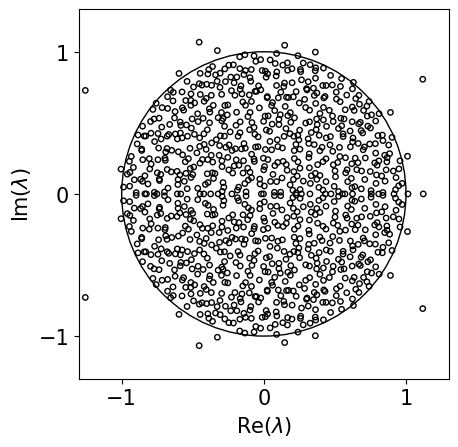

In [2]:
# figure 1a replication
np.random.seed(4)

N = 1000
f = 0.25
N_e = int(N * f)
N_i = N - N_e
var = 1/N
stdev = sqrt(var)
mu_e = 3/sqrt(N)
mu_i = -1/sqrt(N)

assert np.allclose(f*mu_e + (1-f)*mu_i, 0)

col_e = np.random.normal(mu_e, stdev, (N, N_e))
col_i = np.random.normal(mu_i, stdev, (N, N_i))

mat = np.column_stack((col_e, col_i))
eig = np.linalg.eigvals(mat)

matplotlib.rc('font', size=15)

fig,ax = plt.subplots()
ax.scatter(np.real(eig),np.imag(eig), edgecolors='k', facecolors='none', s=15)
circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
plt.xlabel("Re($\lambda$)")
plt.ylabel("Im($\lambda$)")
ax.add_patch(circ)
ax.set_aspect(1)
plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.yticks([-1, 0, 1])
plt.xticks([-1, 0, 1])
plt.savefig("1a.pdf")

plt.show()

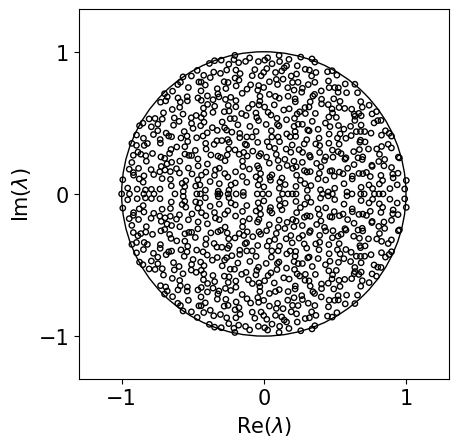

In [3]:
# figure 1b replication
np.random.seed(3)

mu_j = 0
var_j = 1/N
stdev_j = sqrt(var_j)

J = np.random.normal(mu_j, stdev_j, (N,N))
J = J - np.mean(J, 0, keepdims=True)
M = np.repeat(1/sqrt(N) * np.concatenate((mu_e * np.ones(N_e), mu_i * np.ones(N_i)))[None, :], N, 0)

mat = J + M
eig = np.linalg.eigvals(mat)

fig,ax = plt.subplots()
ax.scatter(np.real(eig),np.imag(eig), edgecolors='k', facecolors='none', s=15)
circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
plt.xlabel("Re($\lambda$)")
plt.ylabel("Im($\lambda$)")
ax.add_patch(circ)
ax.set_aspect(1)
plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.yticks([-1, 0, 1])
plt.xticks([-1, 0, 1])
plt.savefig("1b.pdf")
plt.show()

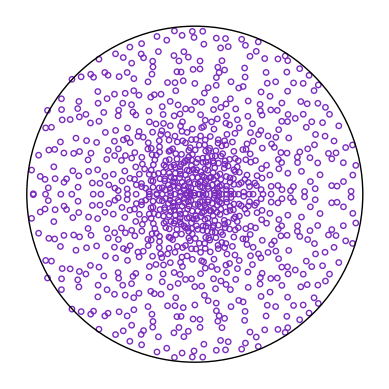

In [4]:
# figure 2a inset replication
np.random.seed(3)

f = 0.5
alpha = 0.06
N_e = int(N * f)
N_i = N - N_e
mu_e = 1/sqrt(N)
mu_i = -1/sqrt(N)
mu_j = 0
var_ji = 1/N
var_je = 1/(N*alpha)
stdev_ji = sqrt(var_ji)
stdev_je = sqrt(var_je)

Je = np.random.normal(mu_j, stdev_je, (N,N_e))
Ji = np.random.normal(mu_j, stdev_ji, (N,N_i))
J = np.column_stack((Je, Ji))
J = J - np.mean(J, 0, keepdims=True)
M = np.repeat(1/sqrt(N) * np.concatenate((mu_e * np.ones(N_e), mu_i * np.ones(N_i)))[None, :], N, 0)

mat = J + M
eig = np.linalg.eigvals(mat)

fig,ax = plt.subplots()
ax.scatter(np.real(eig),np.imag(eig), edgecolors="#7b2cbf", facecolors='none', s=15)
circ = plt.Circle((0, 0), radius=sqrt(1-f + f/alpha), edgecolor='k', facecolor='None')
plt.xlabel("Re($\lambda$)")
plt.ylabel("Im($\lambda$)")
ax.add_patch(circ)
ax.set_aspect(1)
ax.axis("off")

plt.savefig("2a_inset.pdf")
plt.show()

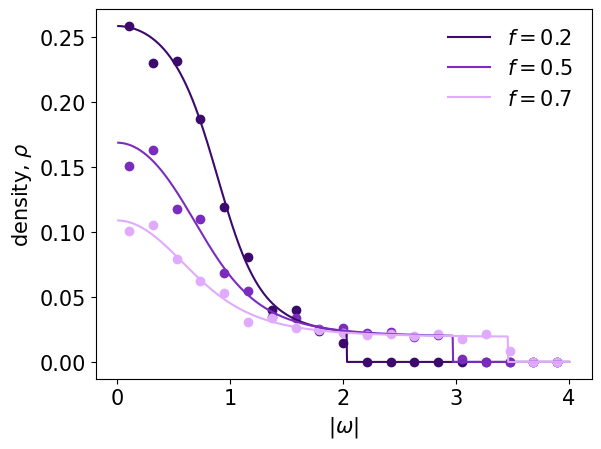

In [5]:
# figure 2a main replication
np.random.seed(5)

colors = ["#3c096c", "#7b2cbf", "#e0aaff"]

fs = np.array([0.2, 0.5, 0.7])
alpha = 0.06
rad_ana = np.linspace(0.01, 4, 1000)
rad_num = np.linspace(0, 4, 20)

rho = lambda rad, phi_pp, phi_p: 1/np.pi * ((rad ** 2) * phi_pp + phi_p)
phi_p = lambda rad, alpha, f, q, q_p: q_p * (1/(q+1) - f/q + alpha * rad **2/(q+1) - rad ** 2 * (alpha*q + 1)/((q+1) ** 2)) + (alpha*q + 1)/(q+1)
phi_pp = lambda rad, alpha, f, q, q_p, q_pp: q_pp * (1/(q+1) - f/q + alpha * rad **2/(q+1) - rad ** 2 * (alpha*q + 1)/((q+1) ** 2)) + \
                                              2*q_p * (alpha/(q+1) - (alpha*q + 1)/((q+1) ** 2)) + \
                                               (q_p ** 2)*(-1/((q+1)**2) + f/(q ** 2) - 2*alpha*(rad ** 2)/((q+1)**2) + (2 * (rad **2)*(alpha*q + 1))/((q+1) ** 3))
q = lambda rad, alpha, f: ((1-alpha) * (rad **2) + 2*f - 1)/(2*(1-f)) + sqrt(((1-alpha)*(rad ** 2)-1)**2 + 4*f*(1-alpha) * (rad **2))/(2*(1-f))
q_p = lambda rad, alpha, f: ((1-alpha)/(2*(1-f))) * (1 + ((1-alpha)* (rad**2) -1 + 2*f)/sqrt(((1-alpha)*(rad ** 2)-1)**2 + 4*f*(1-alpha) * (rad **2)))
q_pp = lambda rad, alpha, f: (((1-alpha) ** 2)/(2*(1-f)*sqrt(((1-alpha)*(rad ** 2)-1)**2 + 4*f*(1-alpha) * (rad **2)))) * \
                             (1 - (((1-alpha)* (rad**2) -1 + 2*f) ** 2)/(((1-alpha)*(rad ** 2)-1)**2 + 4*f*(1-alpha) * (rad **2)))


# analytical results
for i, f in enumerate(fs):
  rhos = []
  for rad in rad_ana:
    if rad ** 2 > (1 - f + f/alpha):
      rhos.append(0)
    else:
      qc = q(rad, alpha, f)
      q_pc = q_p(rad, alpha, f)
      q_ppc = q_pp(rad, alpha, f)
      phi_pc = phi_p(rad, alpha, f, qc, q_pc)
      phi_ppc = phi_pp(rad, alpha, f, qc, q_pc, q_ppc)
      rhoc = rho(rad, phi_ppc, phi_pc)

      rhos.append(rhoc)

  plt.plot(rad_ana, rhos, c=colors[i])

plt.xlabel("|$\omega$|")
plt.ylabel(r"density, $\rho$")


# numerical results
for i, f in enumerate(fs):
  rhos = []

  N_e = int(N * f)
  N_i = N - N_e
  mu_e = 1/sqrt(N)
  mu_i = -1/sqrt(N)
  mu_j = 0
  var_ji = 1/N
  var_je = 1/(N*alpha)
  stdev_ji = sqrt(var_ji)
  stdev_je = sqrt(var_je)

  Je = np.random.normal(mu_j, stdev_je, (N,N_e))
  Ji = np.random.normal(mu_j, stdev_ji, (N,N_i))
  J = np.column_stack((Je, Ji))
  J = J - np.mean(J, 0, keepdims=True)
  M = np.repeat(1/sqrt(N) * np.concatenate((mu_e * np.ones(N_e), mu_i * np.ones(N_i)))[None, :], N, 0)

  mat = J + M
  eig = np.linalg.eigvals(mat)
  eig_rads = np.sqrt(np.real(eig) ** 2 + np.imag(eig) ** 2)
  hist, bin_edge = np.histogram(eig_rads, bins=rad_num, density=False)
  bin_mid = (bin_edge[:-1] + bin_edge[1:])/2
  bin_norm = np.pi * (bin_edge[1:] ** 2) - np.pi * (bin_edge[:-1] ** 2)
  hist = hist/bin_norm
  plt.scatter(bin_mid, (hist)/N, alpha=1, c= colors[i])

plt.legend([fr"$f={f}$" for f in fs], frameon=False)
plt.savefig("2a_main.pdf")
plt.show()

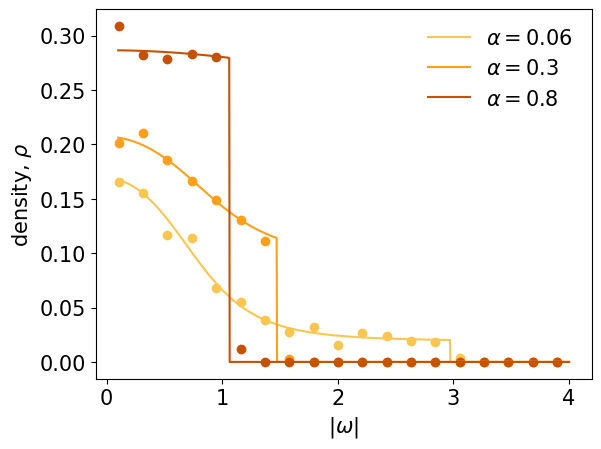

In [15]:
# figure 2b replication
np.random.seed(6)

colors = ["#f9c74f","#ff9f1c", "#c65102"]
f = 0.5
alphas = np.array([0.06, 0.3, 0.8])
var_e = 1/(N*alphas)
var_i = 1/N
rad_ana = np.linspace(0.1, 4, 1000)


for i, alpha in enumerate(alphas):
  rhos = []
  for rad in rad_ana:
    if rad ** 2 > (1 - f + f/alpha):
      rhos.append(0)
    else:
      qc = q(rad, alpha, f)
      q_pc = q_p(rad, alpha, f)
      q_ppc = q_pp(rad, alpha, f)
      phi_pc = phi_p(rad, alpha, f, qc, q_pc)
      phi_ppc = phi_pp(rad, alpha, f, qc, q_pc, q_ppc)
      rhoc = rho(rad, phi_ppc, phi_pc)

      rhos.append(rhoc)

  plt.plot(rad_ana, rhos, c=colors[i])

plt.xlabel("|$\omega$|")
plt.ylabel(r"density, $\rho$")


# numerical results
for i, alpha in enumerate(alphas):
  rhos = []

  N_e = int(N * f)
  N_i = N - N_e
  mu_e = 1/sqrt(N)
  mu_i = -1/sqrt(N)
  mu_j = 0
  var_ji = 1/N
  var_je = 1/(N*alpha)
  stdev_ji = sqrt(var_ji)
  stdev_je = sqrt(var_je)

  Je = np.random.normal(mu_j, stdev_je, (N,N_e))
  Ji = np.random.normal(mu_j, stdev_ji, (N,N_i))
  J = np.column_stack((Je, Ji))
  J = J - np.mean(J, 0, keepdims=True)
  M = np.repeat(1/sqrt(N) * np.concatenate((mu_e * np.ones(N_e), mu_i * np.ones(N_i)))[None, :], N, 0)

  mat = J + M
  eig = np.linalg.eigvals(mat)
  eig_rads = np.sqrt(np.real(eig) ** 2 + np.imag(eig) ** 2)
  hist, bin_edge = np.histogram(eig_rads, bins=rad_num, density=False)
  bin_mid = (bin_edge[:-1] + bin_edge[1:])/2
  bin_norm = np.pi * (bin_edge[1:] ** 2) - np.pi * (bin_edge[:-1] ** 2)
  hist = hist/bin_norm
  plt.scatter(bin_mid, (hist)/N, alpha=1, c=colors[i])

plt.legend([fr"$\alpha={alpha}$" for alpha in alphas], frameon=False)
plt.savefig("2b.pdf")
plt.show()